In [13]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm
from scipy.stats import chi2_contingency
import scipy.stats as stats
from math import log10, log2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
import random


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import chi2_contingency
import scipy.stats as stats
from math import log10, log2

def ICD10_code_to_chapter(let):
    if let == 'nan':
        return 'NaN';
    elif let[0] == 'A' or let[0] == 'B':
        return 'A00–B99';
    elif let[0] == 'C' or (let[0] == 'D' and int(let[1])>=0 and int(let[1])<5):
        return 'C00–D48';
    elif let[0] == 'D' and int(let[1])>=5 and int(let[1])<9:
        return 'D50–D89';
    elif let[0] == 'E':
        return 'E00–E90';
    elif let[0] == 'H' and int(let[1])>=0 and int(let[1])<6:
        return 'H00–H59';
    elif let[0] == 'H' and int(let[1])>=6 and int(let[1])<=9:
        return 'H60–H95';
    elif let[0] == 'K':
        return 'K00–K93';
    elif let[0] == 'P':
        return 'P00–P96';
    elif let[0] == 'S' or let[0] == 'T':
        return 'S00–T98';
    elif let[0] in ['V','W','X','Y']:
        return 'V01–Y98';
    elif let[0] in ['F', 'G','I', 'J', 'L', 'M', 'N', 'O','Q','R','Z','U']:
        return '{}00–{}99'.format(let[0], let[0]);
    else:
        return let;
    
def ICDchapter_to_name(chp):
    if chp == 'nan': return 'NaN';
    elif chp == 'A00–B99': return 'Certain infectious and parasitic diseases';
    elif chp == 'C00–D48': return 'Neoplasms';
    elif chp == 'D50–D89': return 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism';
    elif chp == 'E00–E90': return 'Endocrine, nutritional and metabolic diseases';
    elif chp == 'F00–F99': return 'Mental and behavioural disorders';
    elif chp == 'G00–G99': return 'Diseases of the nervous system';
    elif chp == 'H00–H59': return 'Diseases of the eye and adnexa';
    elif chp == 'H60–H95': return 'Diseases of the ear and mastoid process';
    elif chp == 'I00–I99': return 'Diseases of the circulatory system';
    elif chp == 'J00–J99': return 'Diseases of the respiratory system';
    elif chp == 'K00–K93': return 'Diseases of the digestive system';
    elif chp == 'L00–L99': return 'Diseases of the skin and subcutaneous tissue';
    elif chp == 'M00–M99': return 'Diseases of the musculoskeletal system and connective tissue';
    elif chp == 'N00–N99': return 'Diseases of the genitourinary system';
    elif chp == 'O00–O99': return 'Pregnancy, childbirth and the puerperium';
    elif chp == 'P00–P96': return 'Certain conditions originating in the perinatal period';
    elif chp == 'Q00–Q99': return 'Congenital malformations, deformations and chromosomal abnormalities';
    elif chp == 'R00–R99': return 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified';
    elif chp == 'S00–T98': return 'Injury, poisoning and certain other consequences of external causes';
    elif chp == 'V01–Y98': return 'External causes of morbidity and mortality';
    elif chp == 'Z00–Z99': return 'Factors influencing health status and contact with health services';
    elif chp == 'U00–U99': return 'Codes for special purposes';
    else: return ' ';


# Making analysis datasets

In [15]:
alzdiag = pd.read_csv('/wynton/protected/home/sirota/ykatsuhara/AD_PCA_Clustering/ad_diagnosis.csv')

In [16]:
ICD10_map = alzdiag[['DiagnosisName', 'Value']]

In [17]:
ICD10_map.drop_duplicates(subset=['DiagnosisName', 'Value'], inplace=True)

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
ICD10_map.rename(columns={'Value':'ICD10'}, inplace=True)

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
ICD10_map

,DiagnosisName,ICD10
0,CHF (congestive heart failure) (HCC),I50.9
1,Dysuria,R30.0
2,Mitral regurgitation,I34.0
3,Hyperlipidemia,E78.5
4,Memory loss,R41.3
...,...,...
553688,"Sprain of right rotator cuff capsule, sequela",S43.421S
553720,History of ankle fracture,Z87.81
553726,Injury of left foot,S99.922A
553739,"Incidental pulmonary nodule, greater than or e...",R91.1


In [20]:
loadings = pd.read_csv("PCA_loadings.csv")

In [21]:
loadings['abs_loading'] = loadings['PC1'].abs()
loadings['sign_loading'] = np.sign(loadings['PC1'])

In [22]:
loadings.rename(columns={'Unnamed: 0':'DiagnosisName'}, inplace=True)

In [23]:
loadings

,DiagnosisName,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1493,PC1494,PC1495,PC1496,PC1497,PC1498,PC1499,PC1500,abs_loading,sign_loading
0,"""walking corpse"" syndrome",0.000102,-0.000014,-0.000132,0.000075,0.000036,-0.000175,0.000020,0.000053,0.000108,...,-0.000226,-0.000036,-0.000101,0.000106,0.000006,-0.000096,-5.550073e-05,0.000139,0.000102,1.0
1,'light-for-dates' infant with signs of fetal m...,0.000508,0.000445,0.000056,-0.000085,0.000461,-0.000006,-0.000287,0.000211,0.000497,...,0.000421,-0.000125,0.000233,-0.000256,-0.000276,0.000491,-5.007149e-04,-0.000350,0.000508,1.0
2,(HFpEF) heart failure with preserved ejection ...,0.007853,0.009028,0.006558,-0.004895,-0.000142,0.001023,0.000065,0.002647,0.000717,...,-0.001180,0.000213,-0.000517,-0.000171,0.000373,0.001719,-2.997223e-04,0.000252,0.007853,1.0
3,(Idiopathic) normal pressure hydrocephalus (HCC),0.001320,0.002049,-0.001160,-0.000121,-0.000069,-0.000527,0.001047,-0.001388,-0.000356,...,0.000051,0.000158,-0.000601,0.000063,0.000239,-0.000081,-1.736442e-04,0.000204,0.001320,1.0
4,1st MTP arthritis,0.000136,0.000026,-0.000111,-0.000087,-0.000232,0.000176,-0.000080,-0.000200,0.000023,...,0.000044,-0.000009,0.000048,-0.000226,0.000022,-0.000018,-7.554066e-06,-0.000135,0.000136,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44455,"Zygomatic fracture, left side, initial encount...",0.000077,0.000121,0.000171,-0.000155,0.000036,-0.000066,-0.000003,0.000026,-0.000147,...,-0.000131,0.000167,0.000042,0.000117,-0.000124,0.000027,4.390448e-07,-0.000078,0.000077,1.0
44456,"Zygomatic fracture, unspecified side, initial ...",0.000130,0.000111,0.000023,0.000086,-0.000017,-0.000128,-0.000070,-0.000012,-0.000155,...,0.000143,-0.000123,0.000066,0.000130,-0.000010,-0.000064,1.184838e-04,-0.000090,0.000130,1.0
44457,"Zygomatic fracture, unspecified side, subseque...",0.000034,0.000069,0.000157,-0.000023,-0.000064,0.000038,-0.000016,0.000008,-0.000013,...,0.000180,0.000097,-0.000061,-0.000129,0.000034,0.000026,-5.331931e-05,-0.000043,0.000034,1.0
44458,Zygomatic hyperplasia,0.000157,-0.000097,-0.000152,0.000053,-0.000207,0.000104,-0.000009,0.000107,-0.000051,...,-0.000004,0.000133,0.000159,-0.000034,0.000049,0.000038,-5.457173e-05,0.000043,0.000157,1.0


In [24]:
loading_icd = pd.merge(loadings, ICD10_map, on='DiagnosisName')

In [25]:
loading_icd

,DiagnosisName,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1494,PC1495,PC1496,PC1497,PC1498,PC1499,PC1500,abs_loading,sign_loading,ICD10
0,"""walking corpse"" syndrome",0.000102,-1.376322e-05,-0.000132,0.000075,0.000036,-0.000175,0.000020,0.000053,0.000108,...,-0.000036,-0.000101,0.000106,0.000006,-0.000096,-0.000056,0.000139,0.000102,1.0,F22
1,'light-for-dates' infant with signs of fetal m...,0.000508,4.450065e-04,0.000056,-0.000085,0.000461,-0.000006,-0.000287,0.000211,0.000497,...,-0.000125,0.000233,-0.000256,-0.000276,0.000491,-0.000501,-0.000350,0.000508,1.0,P05.00
2,(HFpEF) heart failure with preserved ejection ...,0.007853,9.027746e-03,0.006558,-0.004895,-0.000142,0.001023,0.000065,0.002647,0.000717,...,0.000213,-0.000517,-0.000171,0.000373,0.001719,-0.000300,0.000252,0.007853,1.0,I50.30
3,(Idiopathic) normal pressure hydrocephalus (HCC),0.001320,2.049099e-03,-0.001160,-0.000121,-0.000069,-0.000527,0.001047,-0.001388,-0.000356,...,0.000158,-0.000601,0.000063,0.000239,-0.000081,-0.000174,0.000204,0.001320,1.0,G91.2
4,1st MTP arthritis,0.000136,2.617734e-05,-0.000111,-0.000087,-0.000232,0.000176,-0.000080,-0.000200,0.000023,...,-0.000009,0.000048,-0.000226,0.000022,-0.000018,-0.000008,-0.000135,0.000136,1.0,M19.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35179,Tuberculin skin test reactor,0.000161,2.674309e-05,-0.000065,-0.000073,0.000098,0.000158,-0.000061,0.000076,0.000105,...,-0.000289,0.000100,-0.000027,0.000130,0.000076,-0.000207,-0.000028,0.000161,1.0,NaN
35180,Tumor,-0.000027,5.620022e-07,-0.000013,-0.000018,0.000008,0.000058,-0.000004,-0.000022,-0.000022,...,-0.000002,-0.000020,-0.000014,0.000083,0.000045,0.000028,-0.000051,0.000027,-1.0,NaN
35181,Vascular disorders of male genital organs,0.000178,4.055439e-05,0.000078,-0.000260,0.000199,-0.000002,0.000164,0.000079,-0.000016,...,0.000047,0.000030,0.000053,0.000026,0.000135,-0.000146,-0.000109,0.000178,1.0,NaN
35182,White coat syndrome with hypertension,0.000280,8.147910e-05,-0.000487,-0.000197,0.000262,-0.000032,-0.000312,0.000121,0.000280,...,-0.000053,-0.000191,0.000028,-0.000106,-0.000216,0.000238,0.000199,0.000280,1.0,NaN


In [26]:
loading_icd['ICD10_chape'] = loading_icd['ICD10'].apply(lambda x: ICD10_code_to_chapter(str(x)[0:3])) # Get ICD10 Chapte

In [27]:
loading_icd

,DiagnosisName,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1495,PC1496,PC1497,PC1498,PC1499,PC1500,abs_loading,sign_loading,ICD10,ICD10_chape
0,"""walking corpse"" syndrome",0.000102,-1.376322e-05,-0.000132,0.000075,0.000036,-0.000175,0.000020,0.000053,0.000108,...,-0.000101,0.000106,0.000006,-0.000096,-0.000056,0.000139,0.000102,1.0,F22,F00–F99
1,'light-for-dates' infant with signs of fetal m...,0.000508,4.450065e-04,0.000056,-0.000085,0.000461,-0.000006,-0.000287,0.000211,0.000497,...,0.000233,-0.000256,-0.000276,0.000491,-0.000501,-0.000350,0.000508,1.0,P05.00,P00–P96
2,(HFpEF) heart failure with preserved ejection ...,0.007853,9.027746e-03,0.006558,-0.004895,-0.000142,0.001023,0.000065,0.002647,0.000717,...,-0.000517,-0.000171,0.000373,0.001719,-0.000300,0.000252,0.007853,1.0,I50.30,I00–I99
3,(Idiopathic) normal pressure hydrocephalus (HCC),0.001320,2.049099e-03,-0.001160,-0.000121,-0.000069,-0.000527,0.001047,-0.001388,-0.000356,...,-0.000601,0.000063,0.000239,-0.000081,-0.000174,0.000204,0.001320,1.0,G91.2,G00–G99
4,1st MTP arthritis,0.000136,2.617734e-05,-0.000111,-0.000087,-0.000232,0.000176,-0.000080,-0.000200,0.000023,...,0.000048,-0.000226,0.000022,-0.000018,-0.000008,-0.000135,0.000136,1.0,M19.079,M00–M99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35179,Tuberculin skin test reactor,0.000161,2.674309e-05,-0.000065,-0.000073,0.000098,0.000158,-0.000061,0.000076,0.000105,...,0.000100,-0.000027,0.000130,0.000076,-0.000207,-0.000028,0.000161,1.0,NaN,NaN
35180,Tumor,-0.000027,5.620022e-07,-0.000013,-0.000018,0.000008,0.000058,-0.000004,-0.000022,-0.000022,...,-0.000020,-0.000014,0.000083,0.000045,0.000028,-0.000051,0.000027,-1.0,NaN,NaN
35181,Vascular disorders of male genital organs,0.000178,4.055439e-05,0.000078,-0.000260,0.000199,-0.000002,0.000164,0.000079,-0.000016,...,0.000030,0.000053,0.000026,0.000135,-0.000146,-0.000109,0.000178,1.0,NaN,NaN
35182,White coat syndrome with hypertension,0.000280,8.147910e-05,-0.000487,-0.000197,0.000262,-0.000032,-0.000312,0.000121,0.000280,...,-0.000191,0.000028,-0.000106,-0.000216,0.000238,0.000199,0.000280,1.0,NaN,NaN


In [28]:
# ICD-10コード順に並べ替え
loading_icd = loading_icd.sort_values(by='ICD10_chape')

In [29]:
# プロットの準備
loading_icd['ind'] = range(len(loading_icd))
loading_icd_grouped = loading_icd.groupby(('ICD10_chape'))

In [30]:
loading_icd['ICD10_chape'].nunique()

22

# PC1 Loadings

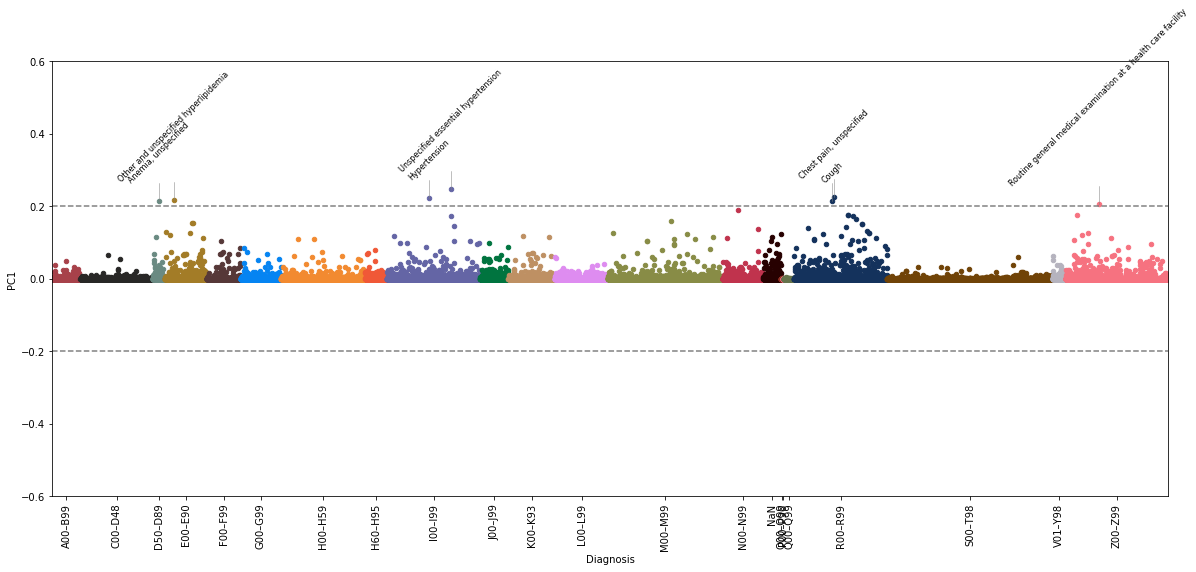

In [31]:

# カラー設定
rand_colors = ['#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7']

# マンハッタンプロット
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(loading_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='PC1', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)

# 軸の範囲を設定
ax.set_xlim([0, len(loading_icd)])
ax.set_ylim([-0.6, 0.6])

# X軸のラベルを設定
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.2, linestyle='--', color='gray')
ax.axhline(y=-0.2, linestyle='--', color='gray')

# 特定の条件を満たす診断名にラベルを追加し、線で結ぶ
for i, row in loading_icd.iterrows():
    if row['PC1'] >= 0.2 or row['PC1'] <= -0.2:
        y_offset = 0.05 if row['PC1'] > 0 else -0.05  # ラベルの位置をデータポイントから少し離す
        ax.text(row['ind'], row['PC1'] + y_offset, row['DiagnosisName'], fontsize=8, rotation=45, ha='center')
        ax.plot([row['ind'], row['ind']], [row['PC1'], row['PC1'] + y_offset], color='gray', linestyle='-', linewidth=0.5)


# グラフを表示
plt.show()

# PC2 Loadings

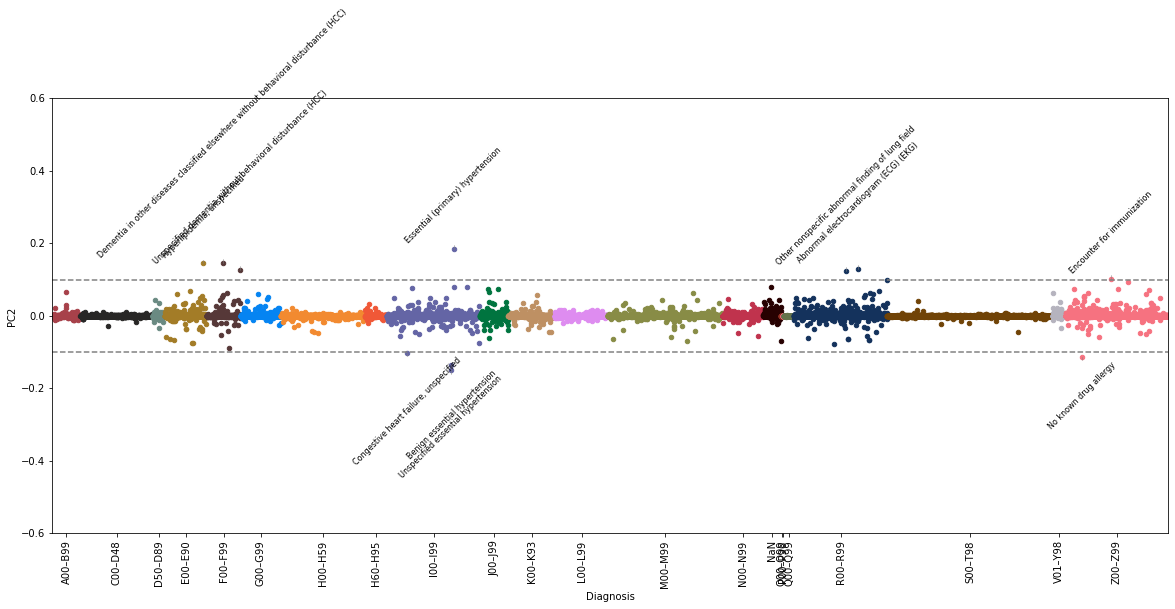

In [32]:

# カラー設定
rand_colors = ['#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7']

# マンハッタンプロット
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(loading_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='PC2', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)

# 軸の範囲を設定
ax.set_xlim([0, len(loading_icd)])
ax.set_ylim([-0.6, 0.6])

# X軸のラベルを設定
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.1, linestyle='--', color='gray')
ax.axhline(y=-0.1, linestyle='--', color='gray')

# 特定の条件を満たす診断名にラベルを追加し、線で結ぶ
for i, row in loading_icd.iterrows():
    offset_length = 0.01  # オフセットの長さ
    if row['PC2'] >= 0.1:
        ax.text(row['ind'], row['PC2'] + offset_length, row['DiagnosisName'], fontsize=8, rotation=45, ha='center', va='bottom')
        ax.plot([row['ind'], row['ind']], [row['PC2'], row['PC2'] + offset_length], color='gray', linestyle='-', linewidth=0.5)
    elif row['PC2'] <= -0.1:
        ax.text(row['ind'], row['PC2'] - offset_length, row['DiagnosisName'], fontsize=8, rotation=45, ha='center', va='top')
        ax.plot([row['ind'], row['ind']], [row['PC2'], row['PC2'] - offset_length], color='gray', linestyle='-', linewidth=0.5)


# グラフを表示
plt.show()

# PC3 Loadings

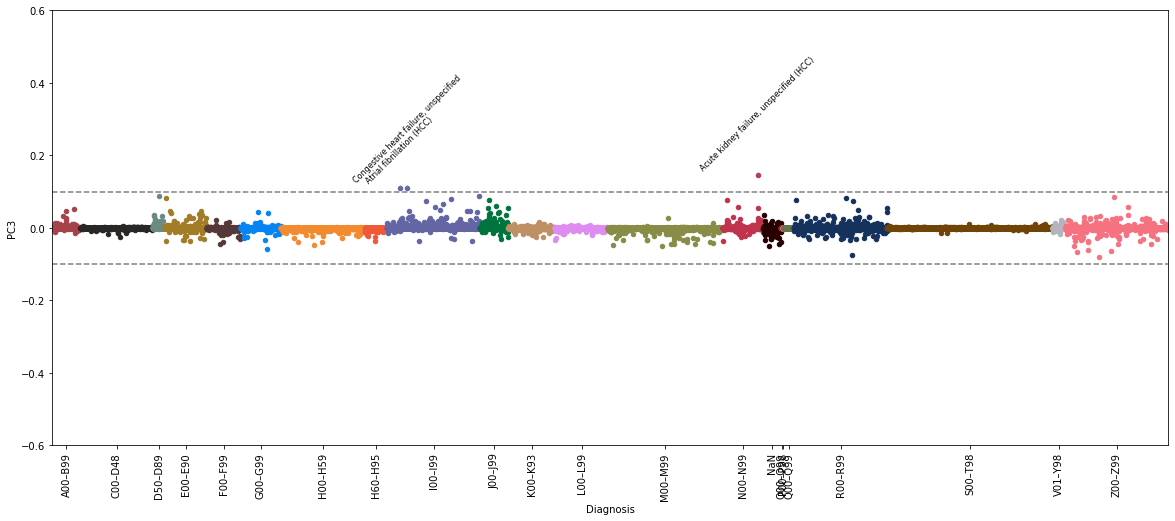

In [33]:

# カラー設定
rand_colors = ['#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7']

# マンハッタンプロット
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(loading_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='PC3', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)

# 軸の範囲を設定
ax.set_xlim([0, len(loading_icd)])
ax.set_ylim([-0.6, 0.6])

# X軸のラベルを設定
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.1, linestyle='--', color='gray')
ax.axhline(y=-0.1, linestyle='--', color='gray')

# 特定の条件を満たす診断名にラベルを追加し、線で結ぶ
for i, row in loading_icd.iterrows():
    offset_length = 0.01  # オフセットの長さ
    if row['PC3'] >= 0.1:
        ax.text(row['ind'], row['PC3'] + offset_length, row['DiagnosisName'], fontsize=8, rotation=45, ha='center', va='bottom')
        ax.plot([row['ind'], row['ind']], [row['PC3'], row['PC3'] + offset_length], color='gray', linestyle='-', linewidth=0.5)
    elif row['PC3'] <= -0.1:
        ax.text(row['ind'], row['PC3'] - offset_length, row['DiagnosisName'], fontsize=8, rotation=45, ha='center', va='top')
        ax.plot([row['ind'], row['ind']], [row['PC3'], row['PC3'] - offset_length], color='gray', linestyle='-', linewidth=0.5)


# グラフを表示
plt.show()

# These diseases have big loadings: Hypertension, Hyperlipidemia, Dementia, Urinary Tract Infection, Acute Kidnery Failure